# Regression
**FIZ228 - Numerical Analysis**  
Dr. Emre S. Tasci, Hacettepe University

```{note}
This lecture is heavily benefited from Steven Chapra's [Applied Numerical Methods with MATLAB: for Engineers & Scientists](https://www.mheducation.com/highered/product/applied-numerical-methods-matlab-engineers-scientists-chapra/M9780073397962.html).
```

**Case Data (Chapra, 14.6):**  
{download}`04_Chapra_data.csv<data/04_Chapra_data.csv>`

|$i$|$x_i$|$y_i$|
|---|---|---|
|1|10|25|
|2|20|70|
|3|30|380|
|4|40|550|
|5|50|610|
|6|60|1220|
|7|70|830|
|8|80|1450|

Let's try to fit it to a linear model, $y = ax+b$. Doesn't matter whether we're using least squares method or minimizer, they will both yield the best answer.

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

data = np.array([range(10,90,10),[25,70,380,550,610,1220,830,1450]]).T
x = data[:,0]
y = data[:,1]
print(data)

[[  10   25]
 [  20   70]
 [  30  380]
 [  40  550]
 [  50  610]
 [  60 1220]
 [  70  830]
 [  80 1450]]


As our function values ($ax + b$) will be calculated as: 

```
a(10) + b = 25
a(20) + b = 70
...
a(80) + b = 1450
```

We also need to include b's coefficients (our polynomial function actually being $a_1 x^1 + a_0 x^0$) in the data as well. We do this by _stacking_ a column of ones for b's coefficients:

In [2]:
A = np.vstack([x,np.ones(len(x))]).T
A

array([[10.,  1.],
       [20.,  1.],
       [30.,  1.],
       [40.,  1.],
       [50.,  1.],
       [60.,  1.],
       [70.,  1.],
       [80.,  1.]])

In [3]:
a,b = np.linalg.lstsq(A,y,rcond=None)[0]
print("a: {:.5f}\tb: {:.5f}".format(a,b))

a: 19.47024	b: -234.28571


## Alternative approaches for fitting via least squares
_(A crash course)_

### np.polyfit()

In [4]:
np.polyfit(x,y,1)

array([  19.4702381 , -234.28571429])

### scipy.optimize.curve_fit()

In [5]:
def f1(x,m,n):
    return m*x+n

res = optimize.curve_fit(f1,x,y)
res[0]

array([  19.47023812, -234.28571562])

While we are at it, let's plot it:

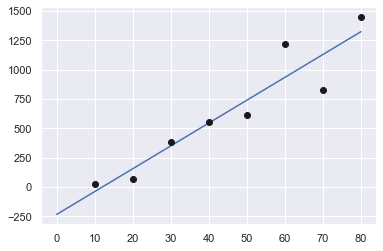

In [6]:
import matplotlib.pyplot as plt

xx = np.linspace(0,80,100)
yy = a*xx + b

plt.plot(xx,yy,"b-",x,y,"ko",markerfacecolor="k")
plt.show()

And here's the error (sum of the squares of the estimate residuals ($S_r$)):

$$S_r = \sum_{i}{e_i^2}=\sum_{i}\left(y_i-a_0-a_1 x_i\right)^2$$

In [7]:
t = a*x + b
e = y-t
S_r = np.sum(e**2)
print(S_r)

216118.1547619048


and here's how to do the same thing (albeit, systematically ;) using functions:

In [8]:
def fun_lin(alpha, beta, x):
    return alpha*x + beta

def err_lin(params):
    e = y - fun_lin(params[0],params[1],x)
    return np.sum(e**2)
err_ls = err_lin([a,b])
print("Least-square sum of squares error: {:10.2f}".format(err_ls))

Least-square sum of squares error:  216118.15


# Linearization of Non-linear Relationships

It doesn't matter much even if the model we're trying to fit is non-linear. We can simply apply a transformation to form it into a linear one. Here are a couple example for handling non-linear functions:

|Model|Nonlinear|Linearized|
|---|-----------|----------|
|exponential|$y=\alpha_1 e^{\beta_1 x}$|$\ln{y}=\ln{\alpha_1}+\beta_1 x$|
|power|$y = \alpha_2 x^{\beta_2}$|$\log{y}=\log{\alpha_2}+\beta_2\log{x}$|
|saturation-growth-rate|$y=\alpha_3\frac{x}{\beta_3+x}$|$\frac{1}{y}=\frac{1}{\alpha_3}+\frac{\beta_3}{\alpha_3}\frac{1}{x}$

![04_nonlinearization_Chapra.png](imgs/04_nonlinearization_Chapra.png)

(Source: [S.C. Chapra, Applied Numerical Methods with MATLAB](https://www.mheducation.com/highered/product/applied-numerical-methods-matlab-engineers-scientists-chapra/M9780073397962.html))

## Same yet different
Instead of fitting the given data into a linear model, let's fit them to a power model:

**Example: Fit the data to the power model (Chapra, 14.6)**  
Data:  

|$i$|$x_i$|$y_i$|
|---|---|---|
|1|10|25|
|2|20|70|
|3|30|380|
|4|40|550|
|5|50|610|
|6|60|1220|
|7|70|830|
|8|80|1450|

Find the optimum $\alpha$ and $\beta$ for the best fit of $y=\alpha x^\beta$ for the given data.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data1 = pd.DataFrame({'i':np.arange(1,9),'x':np.arange(10,90,10),
                      'y':[25,70,380,550,610,1220,830,1450]})
data1.set_index('i', inplace=True)

data1

,x,y
i,,
1,10,25
2,20,70
3,30,380
4,40,550
5,50,610
6,60,1220
7,70,830
8,80,1450


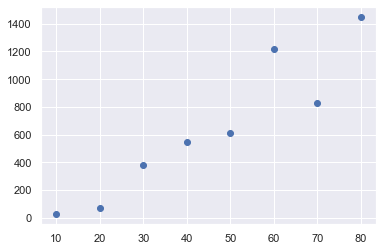

In [10]:
plt.plot(data1.x,data1.y,"o")
plt.show()

## Least-squares proper way:
We can convert it such that 

$$\log{y}=\log{\alpha} + \beta\log{x}$$ 

and as the least square fit for a linear model given as $y' = a_0 + a_1 x'$ is:

$$a_1 = \frac{n\sum{x_i' y_i'} - \sum{x_i'}\sum{y_i'}}{n\sum{x_i'^2}-\left(\sum{x_i'}\right)^2}$$

$$a_0 = \bar{y}' - a_1\bar{x}'$$


(For derivations, refer to [FIZ219 Lecture Notes #5](https://emresururi.github.io/FIZ219/FIZ219_EST_UygulamaNotlari_05_En_kucuk_kareler.html))

and since $x_i' = \log{x_i},\;y_i' = \log{y_i}$:

In [11]:
n = data1.shape[0]
xp = np.log(data1.x)
yp = np.log(data1.y)

a1 = (n*np.sum(xp*yp)-np.sum(xp)*np.sum(yp)) / (n*np.sum(xp**2) - np.sum(xp)**2)
a0 = np.mean(yp) - a1*np.mean(xp)

print("a0: {:7.4f}\na1: {:7.4f}".format(a0,a1))

a0: -1.2941
a1:  1.9842


as $a_0 = \log{\alpha}\rightarrow \alpha = e^{a_0}$ and $a_1 x' = \beta\log{x}\rightarrow  \beta = a_1$

In [12]:
alpha = np.exp(a0)
beta = a1
print("alpha: {:7.4f}\nbeta:  {:7.4f}".format(alpha,beta))

alpha:  0.2741
beta:   1.9842


In [13]:
def fun(alpha, beta, x):
    return alpha*x**beta

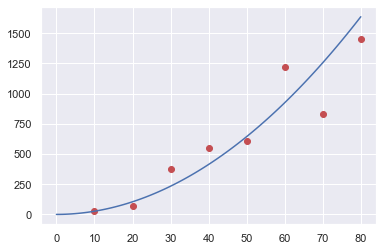

In [14]:
xx = np.linspace(0,80,100);
yy = fun(alpha,beta,xx)
plt.plot(data1.x,data1.y,"or",xx,yy,"-b")
plt.show()

## Minimizing the error function:

In [15]:
def fun_pow(alpha, beta, x):
    return alpha*x**beta

x = data1.x
y = data1.y
def err(params):
    e = y - fun_pow(params[0],params[1],x)
    return np.sum(e**2)

from scipy.optimize import minimize

res = minimize(err,[0.274,1.98])
print(res)
alpha2,beta2 = res.x

      fun: 222604.84843969392
 hess_inv: array([[1.55651470e-09, 3.20791516e-09],
       [3.20791516e-09, 9.26210082e-09]])
      jac: array([0.00390625, 0.05078125])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 129
      nit: 34
     njev: 43
   status: 2
  success: False
        x: array([2.53844123, 1.4358492 ])


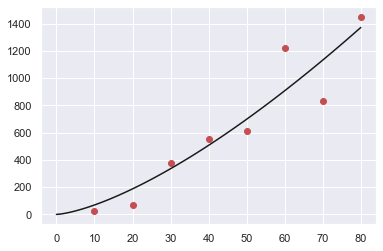

In [16]:
xx = np.linspace(0,80,100);
yy2 = fun(alpha2,beta2,xx)
plt.plot(data1.x,data1.y,"or",xx,yy2,"-k")
plt.show()

### Which one is better?

In [17]:
err_ls = err([alpha,beta])
err_min = err([alpha2,beta2])
print("Least-square sum of squares error: {:10.2f}".format(err_ls))
print("   Minimizer sum of squares error: {:10.2f}".format(err_min))

Least-square sum of squares error:  345713.59
   Minimizer sum of squares error:  222604.85


Let's plot the two side by side:

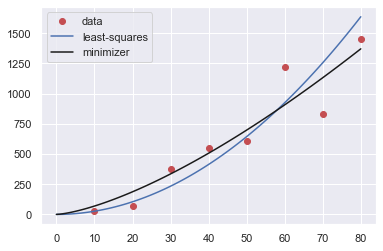

In [18]:
xx = np.linspace(0,80,100);
yy_ls = fun(alpha,beta,xx)
yy_min = fun(alpha2,beta2,xx)
# Blue for least-squares, Black for minimizer
plt.plot(data1.x,data1.y,"or",xx,yy_ls,"-b",xx,yy_min,"-k")
plt.legend(["data","least-squares","minimizer"])
plt.show()

# Really, which one is better?
Apart from the power fits, we performed an even simpler operation, namely, fit the data to a linear model. Let's put all the three together:

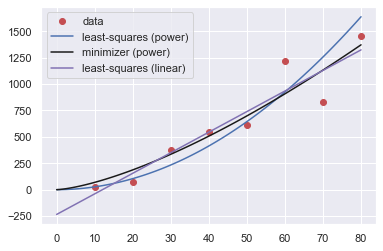

In [19]:
xx = np.linspace(0,80,100);
yy_ls_pow = fun(alpha,beta,xx)
yy_min_pow = fun(alpha2,beta2,xx)
yy_ls_lin = fun_lin(a,b,xx)

# Blue for least-squares, Black for minimizer
plt.plot(data1.x,data1.y,"or",xx,yy_ls_pow,"-b",\
         xx,yy_min_pow,"-k",\
         xx,yy_ls_lin,"-m")
plt.legend(["data","least-squares (power)",\
            "minimizer (power)","least-squares (linear)"])
plt.show()

and here is a table of the errors:

|Method|Error ($S_r$)
---|---
LS (power) | 345713.59
Minimizer (power) | 222604.85
LS (linear) | 216118.15

So, we should take the linear least-squares fit as it yields the closest results... or, is it? (it is indeed, as it has the lowest error).

Now what would you say if I told you, this was some kind of "force vs. velocity" data -- would you change your mind then?

Here, let's make the graph in the proper way:

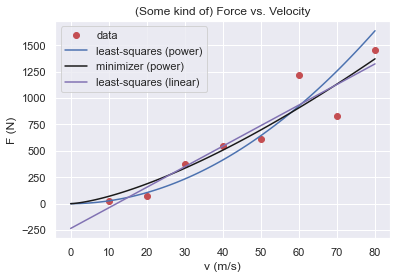

In [20]:
plt.plot(data1.x,data1.y,"or",xx,yy_ls_pow,"-b",\
         xx,yy_min_pow,"-k",\
         xx,yy_ls_lin,"-m")
plt.legend(["data","least-squares (power)",\
            "minimizer (power)","least-squares (linear)"])
plt.title ("(Some kind of) Force vs. Velocity")
plt.xlabel("v (m/s)")
plt.ylabel("F (N)")
plt.show()

Even though the linear model produces better fit, the bothersome thing is its behaviour for small velocities: the fit carries the response to negative forces which doesn't make much sense (can you think of a case that behaves like this? Downwards for low velocities alas upwards for high velocities? Non-newtonian liquids? Not very likely).

Therefore, even if it's not the best fit, realizing that we are actually dealing with forces and velocity, not some mathematical toy but physical quantities, it -hopefully- makes much more sense to choose the power model over the linear model.

So our equation looks something like this:

$$F = \alpha v^\beta$$

with $(\alpha,\beta)$ being equal to:

method|$\alpha$|$\beta$
----|------|----
LS|0.2741|1.9842
Minimizer|2.5384|1.4358

Still, are we insisting on taking the minimizer's results (because it yielded a better fit)?

In physics, the power relations are usually (and interestingly, actually) integers. LS's $\beta$ of 1.9842 looks suspiciously close to a clean 2 whereas the minimizer's 1.4358 looks as if... nothing.

So, to cut a long story short, that "some kind of force" was actually the _Drag Force_ $\vec{D}$, defined as:

$$\vec{D} = \frac{1}{2}C\rho A v^2$$

with $C$ being the drag coefficient (empirically determined); $\rho$ the density of the medium and $A$ being the effective cross-section of the body.

**Moral of the story: We are not mathematicians, nor computers but we are humans and physicists! Always eye-ball the model and more importantly use your heads! 8)**

# Over regression
If you have $n$ datapoints, you can _perfectly_ fit a polynomial of (n-1)th order:

Once again, let's check our good old data:


|$i$|$x_i$|$y_i$|
|---|---|---|
|1|10|25|
|2|20|70|
|3|30|380|
|4|40|550|
|5|50|610|
|6|60|1220|
|7|70|830|
|8|80|1450|

In [21]:
data = np.array([range(10,90,10),[25,70,380,550,610,1220,830,1450]]).T
x = data[:,0]
y = data[:,1]

In [22]:
def err_Sr(y,t):
     # Sum of the squares of the estimate residuals
    return np.sum((y-t)**2)

## Order : 7

In [23]:
p = np.polyfit(x,y,len(x)-1)
print(p)

[ 2.31051587e-07 -6.89097222e-05  8.34131944e-03 -5.27253472e-01
  1.86274861e+01 -3.63810556e+02  3.60735714e+03 -1.37900000e+04]


[  25.           70.          380.          550.          610.
 1220.          830.         1449.99999999]
Sum of squares error:       0.00


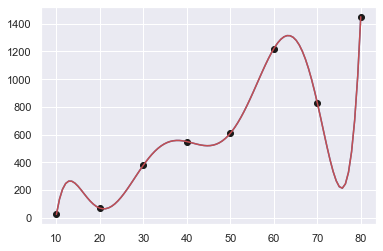

In [24]:
xx = np.linspace(10,80,100)
yy = np.zeros(len(xx))
n = len(x)
for k in range(n):
    yy += p[k]*xx**(n-k-1)

# we could as well had used poly1d function
# to functionalize the polynomial 8)
f = np.poly1d(p)
print(f(x))

print("Sum of squares error: {:10.2f}".format(err_Sr(y,f(x))))

plt.plot(xx,yy,"-b",x,y,"ok",xx,f(xx),"-r")
plt.show()

## Order : 6 ... 2

Order: 6
[ 3.87152778e-06 -1.02071314e-03  1.05383547e-01 -5.39411531e+00
  1.42334687e+02 -1.78109710e+03  8.04437500e+03]
Sum of squares error:   39512.25


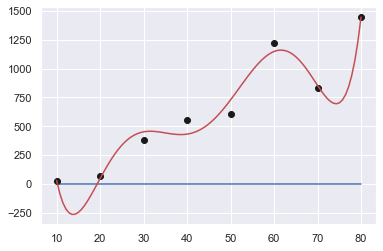

Order: 5
[ 2.45993590e-05 -5.13097319e-03  3.86779575e-01 -1.27692745e+01
  1.96127331e+02 -1.01500000e+03]
Sum of squares error:  157241.89


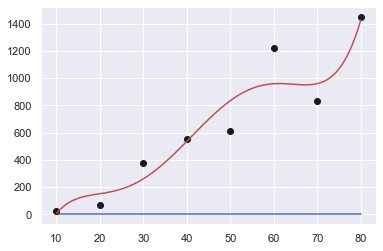

Order: 4
[ 4.03882576e-04 -7.24084596e-02  4.38877841e+00 -8.31222493e+01
  4.92589286e+02]
Sum of squares error:  184213.33


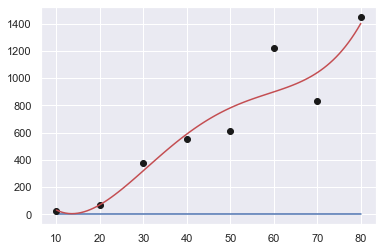

Order: 3
[ 2.90404040e-04 -2.00216450e-03  1.76176046e+01 -1.92857143e+02]
Sum of squares error:  213742.91


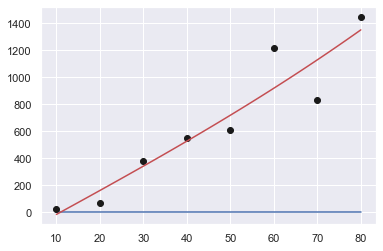

Order: 2
[ 3.72023810e-02  1.61220238e+01 -1.78482143e+02]
Sum of squares error:  213793.01


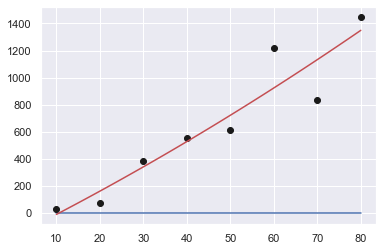

Order: 1
[  19.4702381  -234.28571429]
Sum of squares error:  216118.15


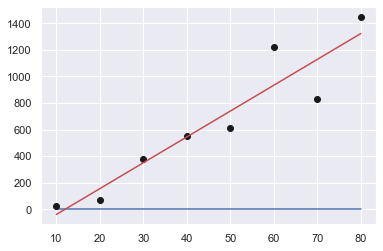

In [25]:
for s in np.arange(2,8):
    print("Order: {:d}".format(len(x)-s))
    p = np.polyfit(x,y,len(x)-s)
    print(p)

    xx = np.linspace(10,80,100)
    yy = np.zeros(len(xx))

    f = np.poly1d(p)
    print("Sum of squares error: {:10.2f}".format(err_Sr(y,f(x))))

    plt.plot(xx,yy,"-b",x,y,"ok",xx,f(xx),"-r")
    plt.show()

# How good are we?

## Coefficient of determination ($r^2$)
We have already met with $r^2$ in our [lecture on least squares](FIZ228_03_LeastSquaresErrors.md): it is concerned with the variations from the average value and residuals' distance.

The data points' distances from the average value leads to the sum of the squares of the data residuals ($S_t$), and defined as:

$$S_t = \sum_{i}{\left(y_i - \bar{y}\right)^2}$$

whereas, the sum of the squares of the estimate residuals ($S_r$) is calculated on the difference between the model estimation and the data:

$$S_r = \sum_{i}{e_i^2}=\sum_{i}\left(y_i-t_i\right)^2$$

And here are them, visualized for a linear fit:

![standard_errors.png](imgs/03_standard_errors_Chapra.png)
(a) $S_t$, (b) $S_r$

(Source: [S.C. Chapra, Applied Numerical Methods with MATLAB](https://www.mheducation.com/highered/product/applied-numerical-methods-matlab-engineers-scientists-chapra/M9780073397962.html))

Using these two quantities, the coefficient of determination ($r^2$) is calculated as:

$$r^2 = \frac{S_t-S_r}{S_t}$$

Where a result of 1 (hence, $S_r = 0$) indicating a perfect fit, $r^2=0$ meaning we could have actually picked the average value and a negative $r^2$ indicating that even picking the average value would be better than this fit!

# Case Study: FTIR data of Silica

Fourier Transform Infrared Spectroscopy is one of the fundamental IR spectrum analysis methods. We are going to investigate the FTIR data of Silica, courtesy of Prof. Sevgi Bayarı.

{download}`Data: 05_Silica_FTIR.csv<data/05_Silica_FTIR.csv>`

In [26]:
data_IR = pd.read_csv("data/05_Silica_FTIR.csv",header=None)
data_IR.columns = ["Wavenumber (cm-1)","Absorbance"]
print(data_IR)

      Wavenumber (cm-1)  Absorbance
0                4000.0     0.03502
1                3999.0     0.03502
2                3998.0     0.03502
3                3997.0     0.03502
4                3996.0     0.03502
...                 ...         ...
3546              454.0     0.41889
3547              453.0     0.41889
3548              452.0     0.41889
3549              451.0     0.41889
3550              450.0     0.41889

[3551 rows x 2 columns]


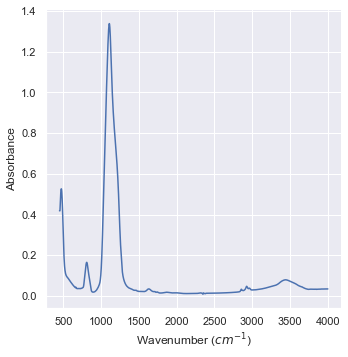

In [27]:
import seaborn as sns
sns.set_theme()

plt1 = sns.relplot(data=data_IR,x="Wavenumber (cm-1)",\
                  y="Absorbance",kind="line")
aux = plt1.set_axis_labels("Wavenumber ($cm^{-1}$)","Absorbance")

In [28]:
data_IR["Wavelength (um)"] = 1/data_IR["Wavenumber (cm-1)"]*1E-2*1E6
print(data_IR)

      Wavenumber (cm-1)  Absorbance  Wavelength (um)
0                4000.0     0.03502         2.500000
1                3999.0     0.03502         2.500625
2                3998.0     0.03502         2.501251
3                3997.0     0.03502         2.501876
4                3996.0     0.03502         2.502503
...                 ...         ...              ...
3546              454.0     0.41889        22.026432
3547              453.0     0.41889        22.075055
3548              452.0     0.41889        22.123894
3549              451.0     0.41889        22.172949
3550              450.0     0.41889        22.222222

[3551 rows x 3 columns]


Let's focus on the highest peak:

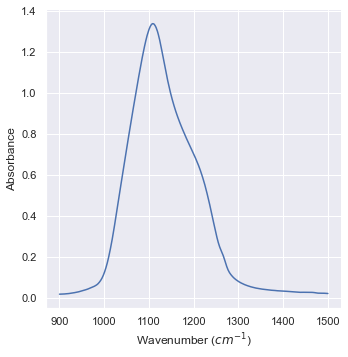

In [29]:
filter1 = (data_IR.iloc[:,0] >=900) & (data_IR.iloc[:,0] <= 1500)
data_IR_filtered = data_IR[filter1]

plt1 = sns.relplot(data=data_IR_filtered,x="Wavenumber (cm-1)",\
                  y="Absorbance",kind="line")
aux = plt1.set_axis_labels("Wavenumber ($cm^{-1}$)","Absorbance")

Let's try to put a Gaussian in it! 8)

$$G(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]}$$

Here, $\frac{1}{\sqrt{2\pi\sigma^2}}$ is the normalization factor that makes it a probability distribution function. Since we are interested in the form of the function itself for the fitting, we're just define an amplitude $A$ instead:

In [30]:
def Gauss(x,A,mu,sigma):
    y = A*np.exp(-(x-mu)**2/(2*sigma**2))
    return y

In [31]:
data_IR_x = data_IR_filtered.iloc[:,0]
data_IR_y = data_IR_filtered.iloc[:,1]

Let's try with a crude approximation for the peak position $(\mu)$, peak value $(A)$ and spreadness $(\sigma)$:

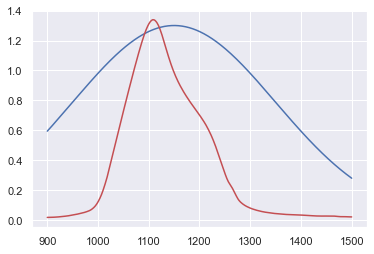

In [32]:
x = data_IR_x
y_0 = Gauss(x,1.30,1150,200)
plt.plot(x,y_0,"b-",data_IR_x,data_IR_y,"r-")
plt.show()

We can surely do better than that!

In [33]:
y_max = np.max(data_IR_y)
i_ymax = np.argmax(data_IR_y)
print(i_ymax,y_max)
x_ymax = data_IR_x.iloc[i_ymax]
print(x_ymax,y_max)

392 1.33854
1108.0 1.33854


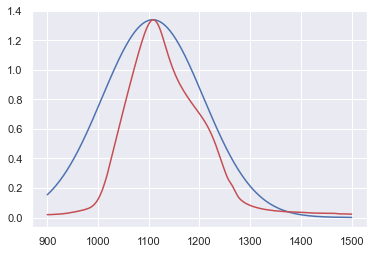

In [34]:
x = data_IR_x
y_1 = Gauss(x,y_max,x_ymax,100)
plt.plot(x,y_1,"b-",data_IR_x,data_IR_y,"r-")
plt.show()

Let's call statistics for help!

$$\mu= <x> = \frac{1}{N}{\sum_{i}{x_i}}$$

$$<x^2> = \frac{1}{N}{\sum_{i}{x_i^2}}$$

$$\sigma^2 = <x^2>-<x>^2$$

1137.1957113048513 81.50784474177878
0.8106737388165177


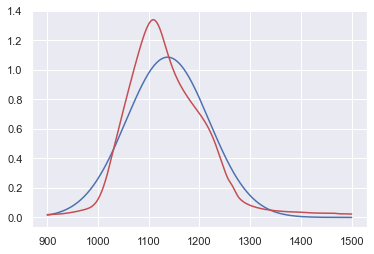

In [35]:
N = np.sum(data_IR_y)
mu_x = np.sum(data_IR_x*data_IR_y)/N
mu_x2 = sum(x**2*data_IR_y)/N
sigma = np.sqrt(mu_x2 - mu_x**2)
y_max_opt = y_max
print(mu_x,sigma)

x = data_IR_x
y_2 = Gauss(x,y_max_opt,mu_x,sigma)
N2 = np.sum(y_2)
print(N/N2)
y_2 *= N/N2
plt.plot(x,y_2,"b-",data_IR_x,data_IR_y,"r-")
plt.show()

In [36]:
y_max_opt

1.33854

**`scipy.optimize.curve_fit()` to the rescue!**

In [37]:
from scipy import optimize
popt,_=optimize.curve_fit(Gauss,data_IR_x,data_IR_y,p0=[y_max,x_ymax,sigma])
print(popt)

[   1.23532539 1123.47082881   69.67020881]


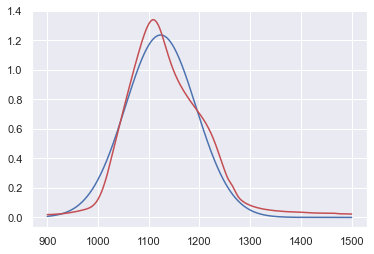

In [38]:
x = data_IR_x
y_3 = Gauss(x,popt[0],popt[1],popt[2])
plt.plot(x,y_3,"b-",data_IR_x,data_IR_y,"r-")
plt.show()

Let's calculate the coefficient of determination $r^2$:

In [39]:
def r2(y,t):
    # y: true data
    # t: model data
    mean = np.mean(y)
    S_t = np.sum((y-mean)**2)
    S_r = np.sum((y-t)**2)
    r2 = (S_t - S_r)/S_t
    return r2

In [40]:
print(r2(data_IR_y,y_0))
print(r2(data_IR_y,y_1))
print(r2(data_IR_y,y_2))
print(r2(data_IR_y,y_3))

-1.0881294117966585
0.634989743541739
0.9273085327036094
0.9702674162337274


# References & Acknowledgements
* This lecture is heavily benefited from Steven Chapra's [Applied Numerical Methods with MATLAB: for Engineers & Scientists](https://www.mheducation.com/highered/product/applied-numerical-methods-matlab-engineers-scientists-chapra/M9780073397962.html).
* I'm indebted to Prof. Sevgi Bayari for generously supplying the FTIR data.